<a href="https://colab.research.google.com/github/MANIKANDAN2112/Creditcardfraud_analysis/blob/main/Creditcardfraudanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  # Import StandardScaler




In [2]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load the dataset
credit_card_data = pd.read_csv('/content/drive/MyDrive/Data sets for project/credit_data.csv')


In [6]:
# Display first 5 rows of the dataset
print(credit_card_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:

# Dataset information
print(credit_card_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

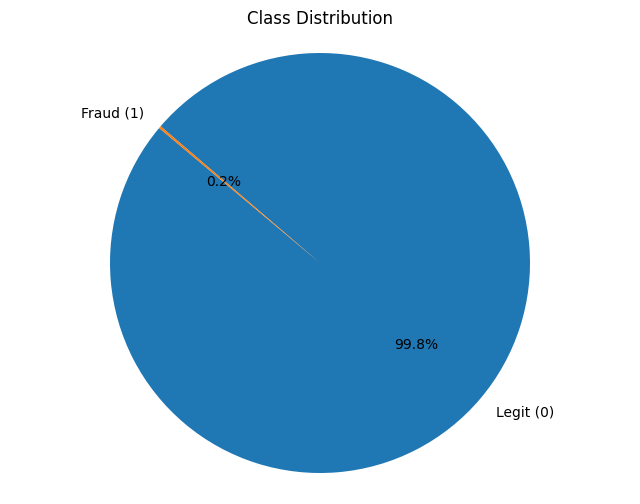

In [26]:
# Distribution of legit transactions & fraudulent transactions
class_counts = credit_card_data['Class'].value_counts()
labels = ['Legit (0)', 'Fraud (1)']
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [9]:
# Statistical measures of the data
print("Legit Transactions Statistics:")
print(credit_card_data[credit_card_data['Class'] == 0]['Amount'].describe())
print("\nFraudulent Transactions Statistics:")
print(credit_card_data[credit_card_data['Class'] == 1]['Amount'].describe())


Legit Transactions Statistics:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent Transactions Statistics:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [10]:
# Compare the values for both transactions
print("\nMean of different features for each class:")
print(credit_card_data.groupby('Class').mean())



Mean of different features for each class:
               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       8

In [11]:
# Sample equal number of legit transactions
legit_sample = credit_card_data[credit_card_data['Class'] == 0].sample(n=492, random_state=42)


In [13]:
# Concatenate sampled legit transactions with fraudulent transactions
new_dataset = pd.concat([legit_sample, credit_card_data[credit_card_data['Class'] == 1]], axis=0)


<ipython-input-27-38bd61d99906>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_dataset,palette=colors)


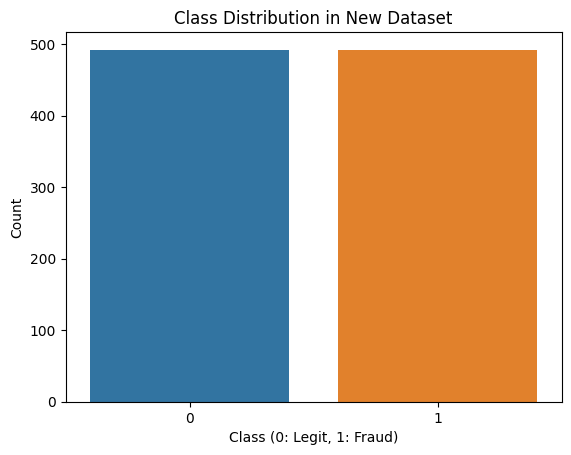

In [27]:
# Check the class distribution in the new dataset
colors = ['#1f77b4', '#ff7f0e']
sns.countplot(x='Class', data=new_dataset,palette=colors)
plt.title('Class Distribution in New Dataset')
plt.xlabel('Class (0: Legit, 1: Fraud)')
plt.ylabel('Count')
plt.show()


In [15]:
# Separate features and target variable
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']



In [28]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [30]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}


In [31]:
#Model optimization using GridSearchCV
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear']}
}



In [32]:
best_models = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)
    best_models[name] = grid_search.best_estimator_


In [33]:
# Evaluate models
for name, model in best_models.items():
    print("\n" + name)
    # Training accuracy
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(train_pred, Y_train)
    print('Training Accuracy: {:.2f}%'.format(train_accuracy * 100))
    # Test accuracy
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(test_pred, Y_test)
    print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))



Logistic Regression
Training Accuracy: 94.79%
Test Accuracy: 91.88%

Random Forest
Training Accuracy: 97.84%
Test Accuracy: 91.88%

Gradient Boosting
Training Accuracy: 99.87%
Test Accuracy: 91.88%

SVM
Training Accuracy: 91.36%
Test Accuracy: 89.85%
